In [295]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('data_medical.cvc')

bmi = (df.weight/(df.height/100)**2).round(decimals=0)
overweigth = pd.DataFrame({'overweigth': np.zeros(len(df))})

for i in np.arange(0,len(bmi)):
    if bmi[i] > 25:
        overweigth['overweigth'][i] = 1
df['overweigth'] = overweigth

#df['bmi'] = bmi
#df.drop(columns='bmi')

df.cholesterol[df.cholesterol == 1] = 0
df.cholesterol[df.cholesterol > 1] = 1
df.gluc[df.gluc == 1] = 0
df.gluc[df.gluc > 1] = 1
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweigth
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


In [327]:
plottdata = df.groupby(['cardio'])['active', 'alco', 'cholesterol','gluc','smoke','overweigth'].sum()
plottdata


,active,alco,cholesterol,gluc,smoke,overweigth
cardio,,,,,,
0,28643,1941,5691,4127,3240,17476.0
1,27618,1823,11924,6394,2929,23005.0


(array([[3., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
        [2., 1., 0., 1., 0., 0., 0., 1., 0., 1.]]),
 array([ 1823.,  4505.,  7187.,  9869., 12551., 15233., 17915., 20597.,
        23279., 25961., 28643.]),
 <a list of 2 Lists of Patches objects>)

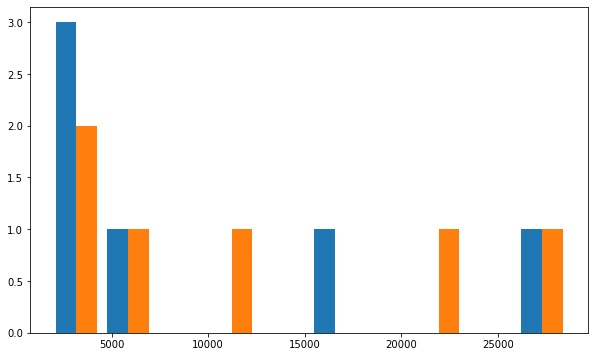

In [330]:
plt.subplots(figsize=(10,6))
plt.hist(plottdata)
plt.xline

In [313]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'overweigth'],
      dtype='object')

In [311]:
df.columns[7:14]

Index(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'overweigth'],
      dtype='object')

In [314]:
plottdata

active        alco       gluc       smoke       overweigth        
cholesterol      0     1     0    1     0     1     0     1          0       1
cardio                                                                        
0            24008  4635  1514  427  1826  2301  2676   564    13994.0  3482.0
1            18024  9594  1004  819  1887  4507  1787  1142    14190.0  8815.0